In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [5]:
pd.read_csv('datadump_s5-000.csv')

,dateid,platform,gamemode,mapname,matchid,roundnumber,objectivelocation,winrole,endroundreason,roundduration,...,primarygrip,primaryunderbarrel,primarybarrel,secondaryweapon,secondaryweapontype,secondarysight,secondarygrip,secondaryunderbarrel,secondarybarrel,secondarygadget
0,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,1,STRIP_CLUB,Defender,AttackersKilledHostage,124,...,Vertical,None,Compensator,5.7_USG,Pistols,None,None,None,None,IMPACT_GRENADE
1,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,4,CHURCH,Defender,AttackersEliminated,217,...,Vertical,Laser,Suppressor,P12,Pistols,None,None,Laser,Suppressor,DEPLOYABLE_SHIELD
2,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,3,CHURCH,Defender,AttackersEliminated,160,...,None,None,None,MK1_9mm,Pistols,None,None,None,None,DEPLOYABLE_SHIELD
3,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,4,CHURCH,Defender,AttackersEliminated,217,...,None,None,MuzzleBrake,PRB92,Pistols,None,None,None,None,IMPACT_GRENADE
4,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,6,BEDROOM,Attacker,DefendersEliminated,143,...,Vertical,Laser,Suppressor,P12,Pistols,None,None,Laser,Suppressor,DEPLOYABLE_SHIELD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,20170221,PS4,HOSTAGE,BANK,1368316041,6,STAFF_ROOM,Defender,AttackersEliminated,158,...,Vertical,None,None,BEARING_9,Submachine_Guns,RedDot,None,None,None,CLAYMORE
3999996,20170221,PS4,HOSTAGE,BANK,1368316041,2,VAULT,Attacker,DefendersEliminated,170,...,Vertical,None,None,BEARING_9,Submachine_Guns,RedDot,None,None,None,CLAYMORE
3999997,20170221,PS4,HOSTAGE,BANK,1368316041,1,VAULT,Attacker,DefendersEliminated,142,...,Vertical,None,MuzzleBrake,M45_MEUSOC,Pistols,None,None,Laser,Suppressor,SMOKE_GRENADE
3999998,20170221,PS4,HOSTAGE,BANK,1368316041,4,VAULT,Defender,AttackersEliminated,156,...,Vertical,None,Compensator,P9,Pistols,None,None,None,None,BREACH_CHARGE


In [6]:
df = pd.read_csv('datadump_s5-000.csv')
df = df.drop(['roundduration','clearancelevel','skillrank','role','team','haswon','nbkills','isdead','primaryweapon','primaryweapontype','primarysight','primarygrip','primaryunderbarrel','primarybarrel','secondaryweapon','secondaryweapontype','secondarysight','secondarygrip','secondaryunderbarrel','secondarybarrel','secondarygadget','platform','matchid'], axis=1, errors='ignore')
df.head()

,dateid,gamemode,mapname,roundnumber,objectivelocation,winrole,endroundreason,operator
0,20170212,HOSTAGE,CLUB_HOUSE,1,STRIP_CLUB,Defender,AttackersKilledHostage,SWAT-CASTLE
1,20170212,HOSTAGE,CLUB_HOUSE,4,CHURCH,Defender,AttackersEliminated,GSG9-JAGER
2,20170212,HOSTAGE,CLUB_HOUSE,3,CHURCH,Defender,AttackersEliminated,JTF2-FROST
3,20170212,HOSTAGE,CLUB_HOUSE,4,CHURCH,Defender,AttackersEliminated,BOPE-CAVEIRA
4,20170212,HOSTAGE,CLUB_HOUSE,6,BEDROOM,Attacker,DefendersEliminated,GSG9-JAGER


In [7]:
le = LabelEncoder()
df['mapname'] = le.fit_transform(df['mapname'])
df['objectivelocation'] = le.fit_transform(df['objectivelocation'])
df['winrole'] = le.fit_transform(df['winrole'])

In [19]:
X = df[['mapname', 'objectivelocation', 'roundnumber', 'winrole']]
y = df['operator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
y_pred = knn.predict(X_test)

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.04201625

Classification Report:
                      precision    recall  f1-score   support

       BOPE-CAPITAO       0.02      0.06      0.03     14150
       BOPE-CAVEIRA       0.04      0.15      0.06     32580
      G.E.O.-JACKAL       0.05      0.15      0.08     41029
        G.E.O.-MIRA       0.05      0.09      0.06     35066
           GIGN-DOC       0.03      0.05      0.04     22512
      GIGN-MONTAGNE       0.02      0.03      0.02     12925
       GIGN-RESERVE       0.00      0.00      0.00      1298
          GIGN-ROOK       0.04      0.06      0.04     28680
        GIGN-TWITCH       0.05      0.08      0.06     40648
        GSG9-BANDIT       0.05      0.06      0.05     38005
         GSG9-BLITZ       0.01      0.00      0.00      4527
            GSG9-IQ       0.02      0.01      0.01     12989
         GSG9-JAGER       0.07      0.06      0.06     52913
       GSG9-RESERVE       0.01      0.00      0.00      3978
          JTF2-BUCK       0.02      0.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

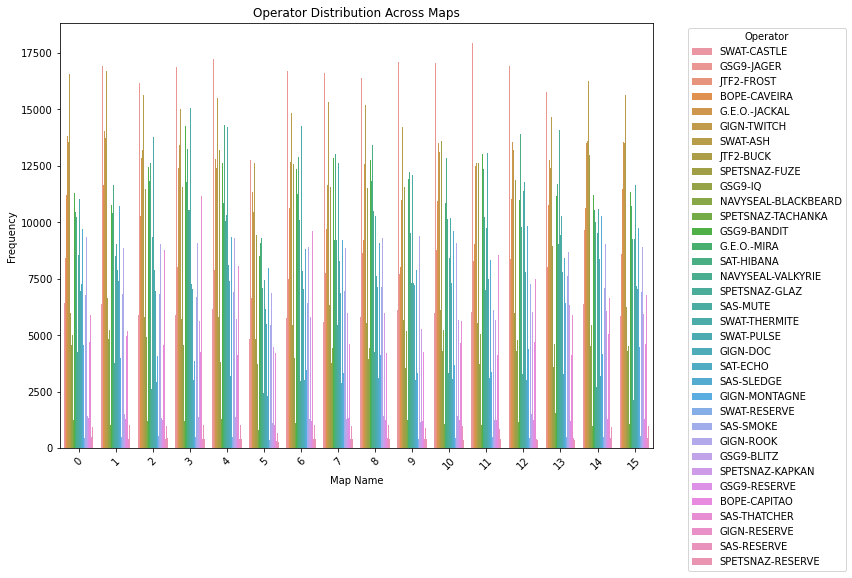

In [13]:
plt.figure(figsize=(12, 8))
sns.countplot(x='mapname', hue='operator', data=df)
plt.title('Operator Distribution Across Maps')
plt.xlabel('Map Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Operator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()